In [95]:
def read_file(filepath):
    with open(filepath) as f:
        data = list(
            map(lambda x: eval(x.strip()), f.read().splitlines())
            )
        
        tuples = [(data[i], 0) if i < 124 else (data[i], 1) for i in range(len(data))]
        tuples.sort(reverse=False)
        
    return zip(*tuples)
        

In [140]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Your function to plot ROC curve for each dataset
def roc(data,labels, ax, plot_label, axs=True):
    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(labels, data)

    # Calculate the Area Under the Curve (AUC)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve on the provided axes (ax)
    if axs:
        ax.plot(fpr, tpr, label=f'{plot_label} (AUC = {roc_auc:.2f})')
        ax.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random classifier
        ax.set_xlabel('False Positive Rate (FPR)')
        ax.set_ylabel('True Positive Rate (TPR)')
        ax.set_title(f'ROC Curve {plot_label}')
        ax.legend(loc='lower right')
        ax.grid(True)
        ax.set_aspect('equal', 'box')
    else:
        plt.plot(fpr, tpr, label=f'{plot_label} (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random classifier
        
    return roc_auc

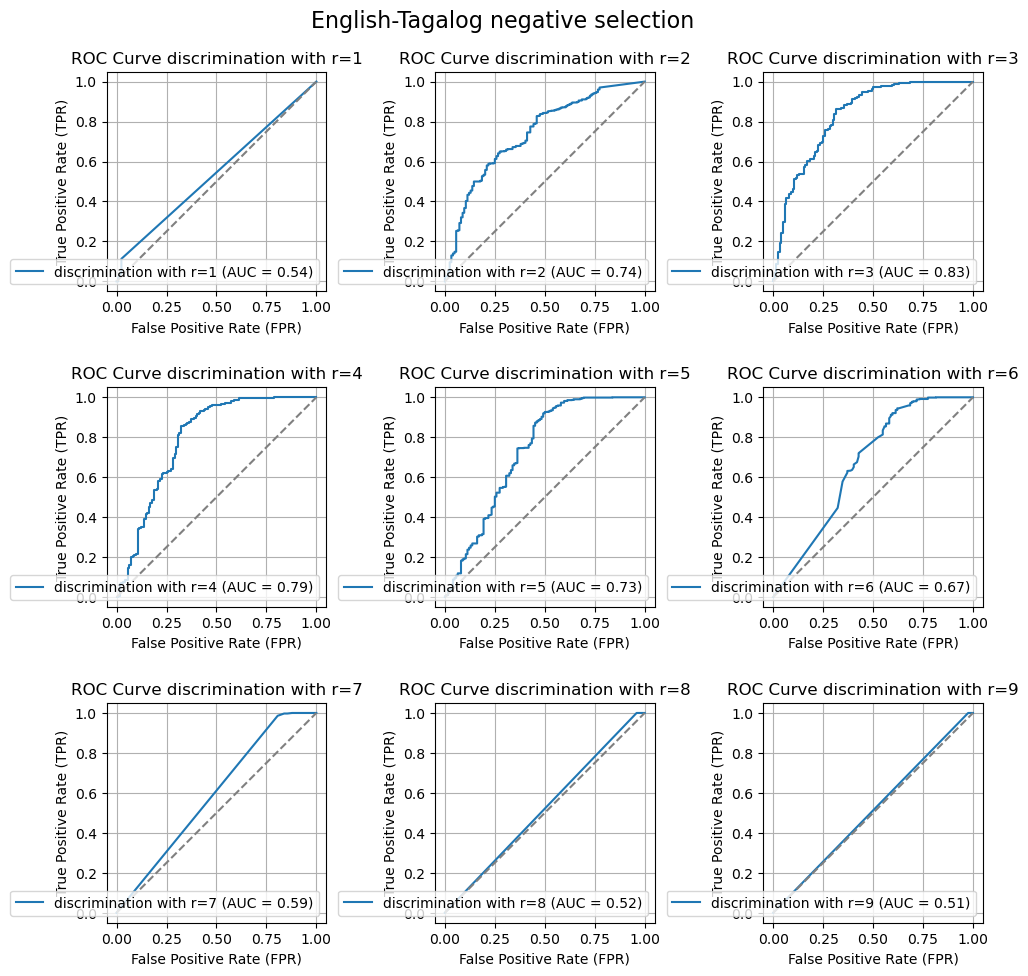

In [97]:
# Create subplots for 8 different ROC curves
fig, axs = plt.subplots(3, 3, figsize=(10, 10))  # 4 rows, 2 columns for 8 subplots
axs = axs.ravel()  # Flatten the 2D array of axes to make it easier to index

# Loop through your files and plot ROC curves in subplots
for n in range(1, 10):
    labels, data = read_file(f"tests/test-english-tagalog-{n}.txt")  # Assuming you have a function to read the files
    roc(labels, data, axs[n-1], f'discrimination with r={n}')  # Plot in the appropriate subplot

# Adjust layout for better spacing between subplots
plt.suptitle('English-Tagalog negative selection', fontsize=16)  # Title above the subplots
plt.tight_layout()
plt.savefig('figures/eng-tag.png')

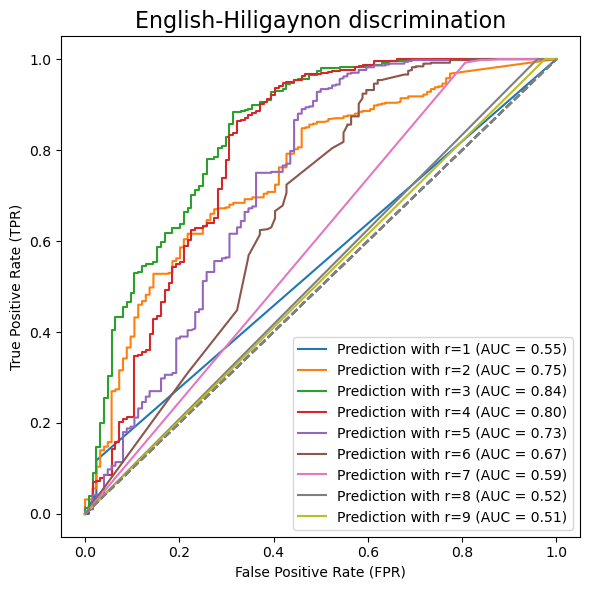

In [98]:
# Create subplots for 8 different ROC curves
fig = plt.figure(figsize=(6, 6))  # 4 rows, 2 columns for 8 subplots
axs = axs.ravel()  # Flatten the 2D array of axes to make it easier to index

# Loop through your files and plot ROC curves in subplots
for n in range(1, 10):
    labels, data = read_file(f"tests/test-english-hiligaynon-{n}.txt")  # Assuming you have a function to read the files
    roc(labels, data, fig, f'Prediction with r={n}', axs=False)  # Plot in the appropriate subplot

# Adjust layout for better spacing between subplots
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.title('English-Hiligaynon discrimination', fontsize=16)  # Title above the subplots
plt.tight_layout()
plt.savefig('figures/eng-hil.png')

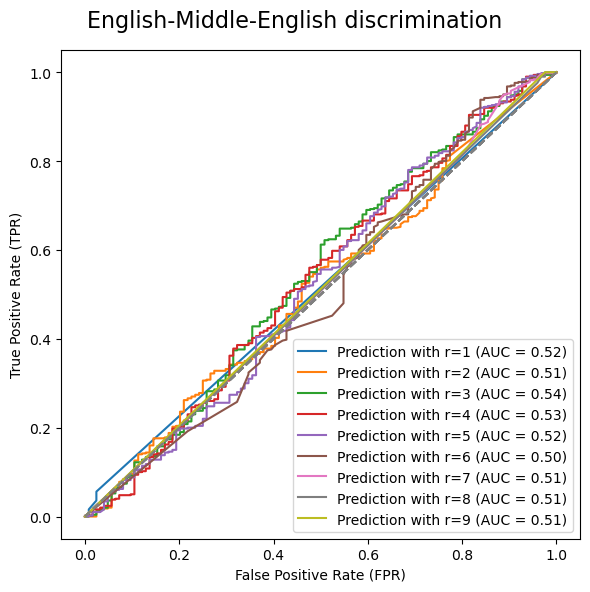

In [99]:
# Create subplots for 8 different ROC curves
fig = plt.figure(figsize=(6, 6))  # 4 rows, 2 columns for 8 subplots

# Loop through your files and plot ROC curves in subplots
for n in range(1, 10):
    labels, data = read_file(f"tests/test-english-middle-english-{n}.txt")  # Assuming you have a function to read the files
    roc(labels, data, fig, f'Prediction with r={n}',axs=False)  # Plot in the appropriate subplot

# Adjust layout for better spacing between subplots
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.suptitle('English-Middle-English discrimination', fontsize=16)  # Title above the subplots
plt.tight_layout()
plt.savefig('figures/eng-mid.png')

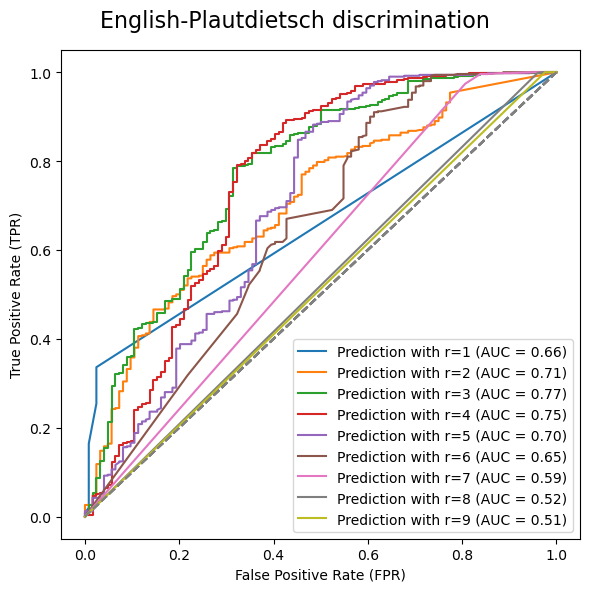

In [100]:
# Create subplots for 8 different ROC curves
fig = plt.figure(figsize=(6, 6))  # 4 rows, 2 columns for 8 subplots

# Loop through your files and plot ROC curves in subplots
for n in range(1, 10):
    labels, data = read_file(f"tests/test-english-plautdietsch-{n}.txt")  # Assuming you have a function to read the files
    roc(labels, data, fig, f'Prediction with r={n}', axs=False)  # Plot in the appropriate subplot

# Adjust layout for better spacing between subplots
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.suptitle('English-Plautdietsch discrimination', fontsize=16)  # Title above the subplots
plt.tight_layout()
plt.savefig('figures/eng-die.png')

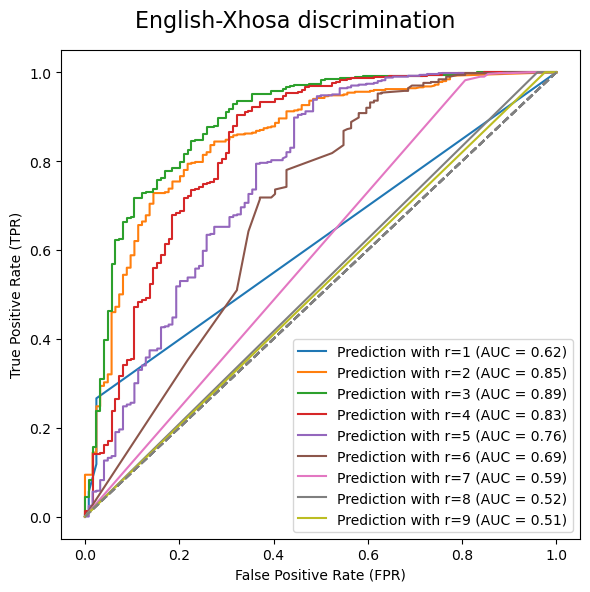

In [101]:
# Create subplots for 8 different ROC curves
fig = plt.figure(figsize=(6, 6))  # 4 rows, 2 columns for 8 subplots

# Loop through your files and plot ROC curves in subplots
for n in range(1, 10):
    labels, data = read_file(f"tests/test-english-xhosa-{n}.txt")  # Assuming you have a function to read the files
    roc(labels, data, fig, f'Prediction with r={n}', axs=False)  # Plot in the appropriate subplot

# Adjust layout for better spacing between subplots
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.suptitle('English-Xhosa discrimination', fontsize=16)  # Title above the subplots
plt.tight_layout()
plt.savefig('figures/eng-xho.png')

In [102]:
def chunk_sequence(sequence, chunk_length=10, overlap=False, step=1, padding_value='N'):
    """
    Split a sequence into fixed-length chunks. 
    If overlap is True, it will create overlapping chunks.
    If the sequence is shorter than the chunk length, it will pad with padding_value.
    """
    chunks = []
    
    # If the sequence is shorter than the chunk length, pad it
    if len(sequence) < chunk_length:
        sequence = sequence + (padding_value * (chunk_length - len(sequence)))

    if overlap:
        # Create overlapping chunks
        for i in range(0, len(sequence) - chunk_length + 1, step):
            chunks.append(sequence[i:i+chunk_length])
        # Ensure the last chunk is padded if necessary
        if len(sequence) % chunk_length != 0:
            chunks.append(sequence[-chunk_length:])
    else:
        # Create non-overlapping chunks
        for i in range(0, len(sequence), chunk_length):
            chunk = sequence[i:i+chunk_length]
            # Pad the last chunk if it is shorter than chunk_length
            if len(chunk) < chunk_length:
                chunk = chunk + (padding_value * (chunk_length - len(chunk)))
            chunks.append(chunk)

    return chunks

In [103]:
# Example usage
sequence = "ACGTACGTACGTAGCTAGCTAGCTA"  # Some sequence

# For non-overlapping chunks
chunks = chunk_sequence(sequence, chunk_length=10, overlap=False)
print("Non-overlapping chunks:", chunks)


Non-overlapping chunks: ['ACGTACGTAC', 'GTAGCTAGCT', 'AGCTANNNNN']


In [104]:
# Assuming data is a list of strings, for example:
data = [
    'apple',
    'banana',
    'orange',
    'apple',
    'grape',
    'banana',
    'kiwi',
    'orange'
]

# Use a set to get unique items
unique_items = set(data)

# Get the number of unique items
num_unique_items = len(unique_items)

# Print the number of unique items
print(f"Number of unique items: {num_unique_items}")


Number of unique items: 5


In [158]:
import itertools


# For overlapping chunks
def generate_training_data(file, chunk_length=7, overlap=True, step=1):
    with open(f"syscalls/snd-{file}/snd-{file}.train") as f:
        data = list(itertools.chain(*map(lambda x: chunk_sequence(x, chunk_length=chunk_length, overlap=overlap, step=step), f.read().splitlines())))
        x = set(data)
        print(len(x), len(data))
    
    with open(f"syscalls/snd-{file}/formatted/snd-{file}-n{chunk_length}-o{overlap}-s{step}.train", "w") as outfile:
        for line in x:
                outfile.write(f"{line}\n")  # Write each chunk as a new line in the output file
                
n=7
for step in range(1,8):
    generate_training_data("cert", chunk_length=n, overlap=True, step=step)
    generate_training_data("unm", chunk_length=n, overlap=True, step=step)

527 701765
949 912332
413 351298
746 456688
322 234947
634 305409
260 176432
577 229315
245 141187
508 183504
208 117898
428 153237
203 101002
449 131273


In [107]:
def match_data_to_index(data):
    # Step 1: Create a set of unique elements from data while preserving the order
    unique_data_set = list(dict.fromkeys(data))
    
    # Step 2: Create a mapping of each unique element to its index in the set
    data_to_index_mapping = {item: idx for idx, item in enumerate(unique_data_set)}
    
    # Step 3: For each element in data, get its index in the unique set
    data_indices = [data_to_index_mapping[item] for item in data]
    
    return data_indices, unique_data_set

In [109]:
# For overlapping chunks
def generate_test_data(file, chunk_length=7, type="cert"):
    with open(f"syscalls/snd-{type}/{file}.test") as f:
        with open(f"syscalls/snd-{type}/{file}.labels") as f1:
            in_data = f.read().splitlines()
            in_labels = f1.read().splitlines()
            comb = zip(in_data, in_labels)
            comb_chunks = list(itertools.chain(*map(lambda x: 
                    [(x[0],chunk, x[1][1]) for chunk in chunk_sequence(x[1][0], chunk_length=chunk_length, overlap=True, step=5)]
                     , enumerate(comb))))
            index, data, labels = zip(*comb_chunks)
            
            data_indices, unique_data_set = match_data_to_index(data)
            
    with open(f"syscalls/snd-{type}/formatted/{file}-n{chunk_length}.test", "w") as outfile:
        for line in unique_data_set:
                outfile.write(f"{line}\n")  # Write each chunk as a new line in the output file
    
    with open(f"syscalls/snd-{type}/formatted/{file}-n{chunk_length}.data-places", "w") as outfile:
        for line in data_indices:
                outfile.write(f"{line}\n")  # Write each chunk as a new line in the output file            
                
    with open(f"syscalls/snd-{type}/formatted/{file}-n{chunk_length}.data", "w") as outfile:
        for line in data:
                outfile.write(f"{line}\n")  # Write each chunk as a new line in the output file            
        
    with open(f"syscalls/snd-{type}/formatted/{file}-n{chunk_length}.labels", "w") as outfile:
        for line in labels:
                outfile.write(f"{line}\n")  # Write each chunk as a new line in the output file
                
    with open(f"syscalls/snd-{type}/formatted/{file}-n{chunk_length}.index", "w") as outfile:
        for line in index:
                outfile.write(f"{line}\n")  # Write each chunk as a new line in the output file
                


In [110]:

n = 7
for i in range(1,4):
    generate_test_data(f"snd-cert.{i}", chunk_length=n, type="cert")
    generate_test_data(f"snd-unm.{i}", chunk_length=n, type="unm")

In [122]:
import pandas as pd

def read_test_file_df(filepath, type, v, n =10):
    with open(filepath) as f:
        dataset = list(
            map(lambda x: eval(x.strip()), f.read().splitlines())
            )
        with open(f"syscalls/snd-{type}/formatted/snd-{type}.{v}-n{n}.labels") as f1:
            labels = list(
                map(lambda x: eval(x.strip()), f1.read().splitlines())
                )
            with open(f"syscalls/snd-{type}/formatted/snd-{type}.{v}-n{n}.index") as f2:
                indexes = list(
                        map(lambda x: eval(x.strip()), f2.read().splitlines())
                    ) 
                with open(f"syscalls/snd-{type}/formatted/snd-{type}.{v}-n{n}.data-places") as f3:
                    data_places = list(
                        map(lambda x: eval(x.strip()), f3.read().splitlines())
                    ) 
                    
                    data = [dataset[x] for x in data_places]
                    df = pd.DataFrame({
                        'data': data,
                        'labels': labels,
                        'index': indexes
                    })
                    
                    return df

In [256]:
import pandas as pd

def read_test_file(filepath, type, v, n =10):
    with open(filepath) as f:
        dataset = list(
            map(lambda x: eval(x.strip()), f.read().splitlines())
            )
        with open(f"syscalls/snd-{type}/formatted/snd-{type}.{v}-n{n}.labels") as f1:
            labels = list(
                map(lambda x: eval(x.strip()), f1.read().splitlines())
                )
            with open(f"syscalls/snd-{type}/formatted/snd-{type}.{v}-n{n}.index") as f2:
                indexes = list(
                        map(lambda x: eval(x.strip()), f2.read().splitlines())
                    ) 
                with open(f"syscalls/snd-{type}/formatted/snd-{type}.{v}-n{n}.data-places") as f3:
                    data_places = list(
                        map(lambda x: eval(x.strip()), f3.read().splitlines())
                    ) 
                    
                    data = [dataset[x] for x in data_places]
                    df = pd.DataFrame({
                        'data': data,
                        'labels': labels,
                        'index': indexes
                    })
                    
                    # Group by 'index', take the maximum of 'data' and pick any label (first in the group)
                    result = df.groupby('index').agg({
                        'data': 'mean',  # Get the maximum value of 'data'
                        'labels': 'last'  # Pick the first label in the group
                    })
                    # Convert the result back to a list of tuples
                    result_tuples = list(zip(result['data'], result['labels']))

    return zip(*result_tuples)
        

In [124]:
df = read_test_file_df("syscalls/snd-cert/tests/test-syscall-explicit-snd-cert.1-n10-4.txt", "cert", 1, n =7)

In [125]:
ad = df[df["data"] != 0]
ad_na = ad[ad["labels"] == 0]
print(ad_na)

           data  labels  index
5048  34.818054       0     49


In [126]:
import pandas as pd

def comp_an_strings(type="cert",v="1",n=7, r=4):
    with open(f"syscalls/snd-{type}/formatted/snd-{type}-n{n}-oTrue-s5.train") as f1:
        train = list(
            map(lambda x: x.strip(), f1.read().splitlines())
            )
        with open(f"syscalls/snd-{type}/formatted/snd-{type}.{v}-n{n}.test") as f2:
            test = list(
                    map(lambda x: x.strip(), f2.read().splitlines())
                ) 
            with open(f"syscalls/snd-{type}/tests/test-syscall-snd-{type}.{v}-n{n}-{r}.txt") as f2:
                eval_test = list(
                        map(lambda x: x.strip(), f2.read().splitlines())
                    ) 
                
        return train, test, eval_test

In [127]:
import Levenshtein

for v in range(1,4):
    train, test, e = comp_an_strings(type="cert",v=v,n=7, r=4)
    te = list(zip(test, e))
    not_in_train = [x for x in te if x[0] not in train]
    in_train = [x for x in te if x[0] in train]

    dist = [ (x[0], x[1], min([Levenshtein.distance(x[0], y) for y in train])) for x in te]
    dist_normal = [x for x in dist if eval(x[1]) == 0]
    dist_intrusion = [x for x in dist if eval(x[1]) != 0]
    print(max(dist, key=lambda x: x[1]))
    print(max(dist_normal, key=lambda x: x[2]))
    print(min(dist_intrusion, key=lambda x: x[2]))

('tYYYsrr', '19.40261448514795', 4)
('QGEHIHD', '0.0', 4)
('rtsrrtY', '17.396019370251135', 1)
('rrtYYYs', '19.40261448514795', 3)
('QGEHIHD', '0.0', 4)
('srrtsuC', '17.39606955763987', 1)
('N-iiiYs', '19.40261448514795', 5)
('bEhWPMW', '0.0', 4)
('BBsrrtN', '17.395918990235728', 1)


In [128]:
with open("syscalls/snd-cert/tests/test-syscall-explicit-snd-cert.1-n10-4.txt") as f:
    stuff = list(
        map(lambda x: eval(x.strip()), f.read().splitlines())
        )
print(stuff)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 35.80489152098547, 36.3942285458913, 0.0, 0.0, 36.81807012865986, 36.818060325041, 0.0, 35.80489152098547, 36.3942285458913, 0.0, 0.0, 35.80489152098547, 36.3942285458913, 0.0, 0.0, 35.80489152098547, 36.39422

In [129]:
l,d = read_test_file(f"syscalls/snd-cert/tests/test-syscall-snd-cert.1-n7-4.txt","cert", 1, n=7)
d

(0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1)

In [130]:
# for i in range(1,4):
#     # Create subplots for 8 different ROC curves
#     fig, axs = plt.subplots(3, 3, figsize=(10, 10))  # 4 rows, 2 columns for 8 subplots
#     axs = axs.ravel()  # Flatten the 2D array of axes to make it easier to index
#     # Loop through your files and plot ROC curves in subplots
#     for n in range(1, 8):
#         labels, data = read_test_file(f"syscalls/snd-cert/tests/test-syscall-snd-cert.{i}-n10-{n}.txt","cert", i) # Assuming you have a function to read the files
#         roc(labels, data, axs[n-1], f'Prediction with r={n}')  # Plot in the appropriate subplot

#     # Adjust layout for better spacing between subplots
#     plt.tight_layout()
#     plt.show()
    
# for i in range(1,4):
#     # Create subplots for 8 different ROC curves
#     fig, axs = plt.subplots(3, 3, figsize=(10, 10))  # 4 rows, 2 columns for 8 subplots
#     axs = axs.ravel()  # Flatten the 2D array of axes to make it easier to index
#     # Loop through your files and plot ROC curves in subplots
#     for n in range(1, 8):
#         labels, data = read_test_file(f"syscalls/snd-unm/tests/test-syscall-snd-unm.{i}-n10-{n}.txt","unm", i) # Assuming you have a function to read the files
#         roc(labels, data, axs[n-1], f'Prediction with r={n}')  # Plot in the appropriate subplot

#     # Adjust layout for better spacing between subplots
#     plt.tight_layout()
#     plt.show()

In [163]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Your function to plot ROC curve for each dataset
def get_auc(data,labels):
    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(labels, data)

    # Calculate the Area Under the Curve (AUC)
    roc_auc = auc(fpr, tpr)
        
    return roc_auc

In [178]:
import os
import csv

# Function to write data and labels to CSV
def write_to_csv(data, labels, file_path):
    # Write data and labels to CSV
    with open(file_path, mode='w', newline='') as file:
        writer = csv.writer(file)
        
        # Assuming that labels and data are in a compatible format (e.g., lists or arrays)
        # Write header (optional)
        writer.writerow(['Label', 'Data','r'])  # Modify header as needed
        
        # Write the data and labels row by row
        for i, (labs, dats) in enumerate(zip(labels, data)):
            for label, datum in zip(labs, dats):
                writer.writerow([label, datum,i+1])

In [257]:
for i in range(1,4):
    for s in range(1,8):
        print(i,s)
        total_labels = []
        total_data = []
        for r in range(1, 8):
        
            data, labels = read_test_file(f"syscalls/snd-cert/tests/test-syscall-s{s}-snd-cert.{i}-n7-{r}.txt","cert", i, n=7) # Assuming you have a function to read the files
            total_labels.append(labels)
            total_data.append(data)
            
        write_to_csv(total_data, total_labels, f"syscalls/snd-cert/results/mean-test-syscall-s{s}-snd-cert.{i}-n7.csv")
            

1 1
1 2
1 3
1 4
1 5
1 6
1 7
2 1
2 2
2 3
2 4
2 5
2 6
2 7
3 1
3 2
3 3
3 4
3 5
3 6
3 7


In [258]:
for i in range(1,4):
    for s in range(1,8):
        print(i,s)
        total_labels = []
        total_data = []
        for r in range(1, 8):
        
            data, labels = read_test_file(f"syscalls/snd-unm/tests/test-syscall-s{s}-snd-unm.{i}-n7-{r}.txt","unm", i, n=7) # Assuming you have a function to read the files
            total_labels.append(labels)
            total_data.append(data)
            
        write_to_csv(total_data, total_labels, f"syscalls/snd-unm/results/mean-test-syscall-s{s}-snd-unm.{i}-n7.csv")
            

1 1
1 2
1 3
1 4
1 5
1 6
1 7
2 1
2 2
2 3
2 4
2 5
2 6
2 7
3 1
3 2
3 3
3 4
3 5
3 6
3 7


In [263]:
rocs_cert = []
for i in range(1,4):
    # Create subplots for 8 different ROC curves
    # Loop through your files and plot ROC curves in subplots
    rocs_dir = {}
    for s in range(1,8):
        df = pd.read_csv(f"syscalls/snd-cert/results/mean-test-syscall-s{s}-snd-cert.{i}-n7.csv", header=0)
        rocs_dir[s]=df
        
    rocs_cert.append( (i, rocs_dir))

aucs = []
for dataset_nr, steps in rocs_cert:
    auc_dataset = []
    for step in steps.keys():
        lst = steps[step].groupby('r')[['Label', 'Data']].apply(lambda x: x.values.tolist())
        auc_step = []
        for key in lst.keys():
            labdata = lst[key]
            labels, data = zip(*labdata)
            labels = list(map(lambda x: int(x), labels))
            auc_step.append(get_auc(data, labels))
        auc_dataset.append(auc_step)
    aucs.append(auc_dataset)
aucs

[[[0.62, 0.87, 0.97, 0.98, 0.98, 0.98, 0.98],
  [0.6088,
   0.9611999999999999,
   0.9788,
   0.9763999999999999,
   0.9763999999999999,
   0.9763999999999999,
   0.9772],
  [0.6080000000000001,
   0.9496,
   0.9468,
   0.946,
   0.9463999999999999,
   0.9639999999999999,
   0.966],
  [0.6719999999999999,
   0.938,
   0.9692,
   0.9688,
   0.9683999999999999,
   0.968,
   0.968],
  [0.77,
   0.9169999999999999,
   0.9683999999999999,
   0.9683999999999999,
   0.9683999999999999,
   0.9716,
   0.972],
  [0.7404000000000001,
   0.9304,
   0.9279999999999999,
   0.9299999999999999,
   0.9288,
   0.9396,
   0.9443999999999999],
  [0.8152, 0.9424, 0.9596, 0.9588, 0.9556, 0.965, 0.9673999999999999]],
 [[0.62, 0.81716, 0.91536, 0.93576, 0.93576, 0.93584, 0.93584],
  [0.6194400000000001,
   0.91936,
   0.9522999999999999,
   0.95418,
   0.9537,
   0.9542999999999999,
   0.9542799999999999],
  [0.6143200000000001,
   0.9146599999999999,
   0.9223,
   0.9247799999999999,
   0.9240599999999999,
 

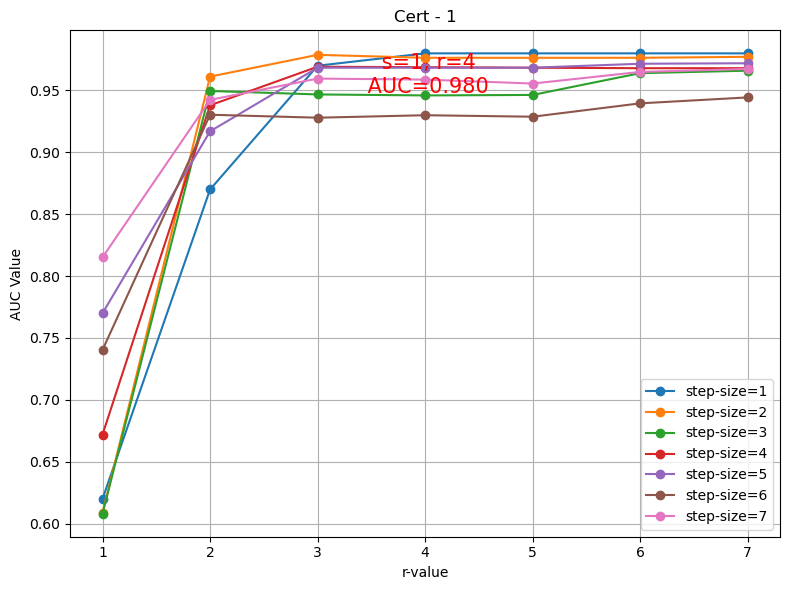

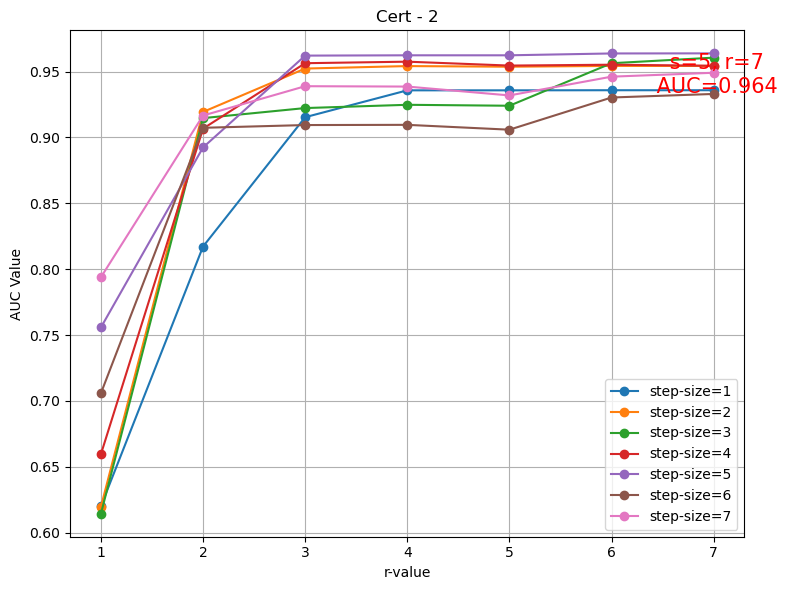

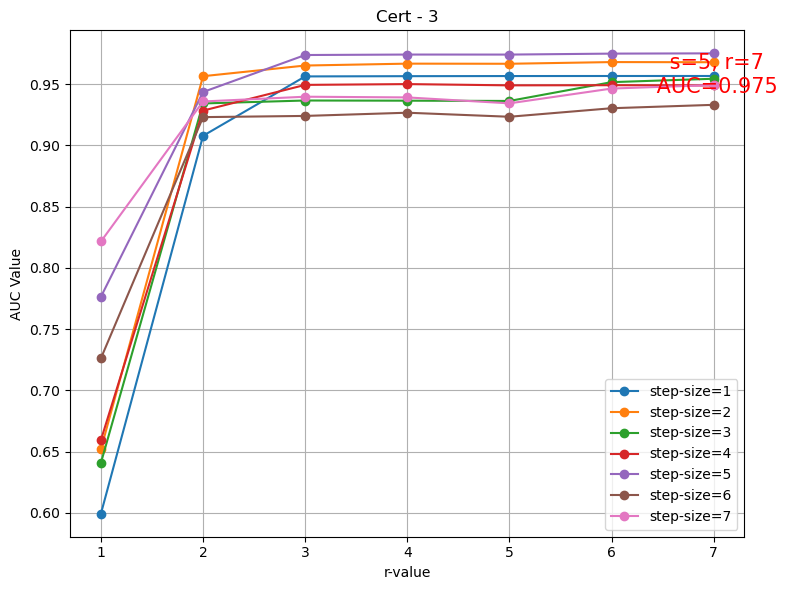

In [264]:


# Loop through each dataset and plot its steps
for i, auc_dataset in enumerate(aucs):
    # Create the plots
    fig = plt.figure( figsize=(8, 6))

    max_auc=0
    max_r=None
    max_s=None
    for s in range(7):  # For s=1 to s=7
        auc_values = auc_dataset[s]
        plt.plot(range(1, len(auc_values) + 1), auc_values, marker='o', label=f'step-size={s+1}')

        # Find the maximum AUC value for this step
        if max(auc_values) > max_auc:
            max_auc = max(auc_values)
            max_r = auc_values.index(max_auc) + 1  # index gives 0-based, we need 1-based for r
            max_s = s
    plt.text(max_r, max_auc, f' s={max_s+1}, r={max_r}\n AUC={max_auc:.3f}',fontsize=15, ha='center', va='top', color='red')

    # Customize each subplot
    plt.title(f'Cert - {i+1}')
    plt.xlabel('r-value')
    plt.ylabel('AUC Value')
    plt.grid(True)
    plt.legend()

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.savefig(f'figures/cert-{i+1}-mean')

In [265]:
rocs_unm = []
for i in range(1,4):
    # Create subplots for 8 different ROC curves
    # Loop through your files and plot ROC curves in subplots
    rocs_dir = {}
    for s in range(1,8):
        df = pd.read_csv(f"syscalls/snd-unm/results/mean-test-syscall-s{s}-snd-unm.{i}-n7.csv", header=0)
        rocs_dir[s]=df
        
    rocs_unm.append( (i, rocs_dir))

aucs = []
for dataset_nr, steps in rocs_unm:
    auc_dataset = []
    for step in steps.keys():
        lst = steps[step].groupby('r')[['Label', 'Data']].apply(lambda x: x.values.tolist())
        auc_step = []
        for key in lst.keys():
            labdata = lst[key]
            labels, data = zip(*labdata)
            labels = list(map(lambda x: int(x), labels))
            auc_step.append(get_auc(data, labels))
        auc_dataset.append(auc_step)
    aucs.append(auc_dataset)
aucs

[[[0.5, 0.71, 0.8300000000000001, 0.87, 0.87, 0.87, 0.87],
  [0.47,
   0.8572,
   0.9051999999999999,
   0.9079999999999999,
   0.95,
   0.9520000000000001,
   0.9528],
  [0.5853999999999999,
   0.8845999999999999,
   0.9136,
   0.9148,
   0.9148,
   0.9339999999999999,
   0.9344],
  [0.47, 0.8614, 0.8914000000000001, 0.8914, 0.909, 0.913, 0.915],
  [0.7,
   0.9133999999999999,
   0.9431999999999999,
   0.9436,
   0.9632,
   0.9632,
   0.9632],
  [0.7786000000000001, 0.9212, 0.9248, 0.9264, 0.9436, 0.9436, 0.9452],
  [0.6066,
   0.8655999999999999,
   0.8964,
   0.898,
   0.9311999999999999,
   0.9328,
   0.9363999999999999]],
 [[0.5,
   0.6768799999999999,
   0.77568,
   0.8151600000000001,
   0.8150000000000001,
   0.8150000000000001,
   0.8152400000000001],
  [0.488,
   0.87932,
   0.9031999999999999,
   0.9046799999999999,
   0.95732,
   0.957,
   0.9572],
  [0.63048, 0.9046, 0.91692, 0.9142799999999999, 0.9146, 0.95584, 0.95548],
  [0.487,
   0.9276199999999999,
   0.94056,
   0.9

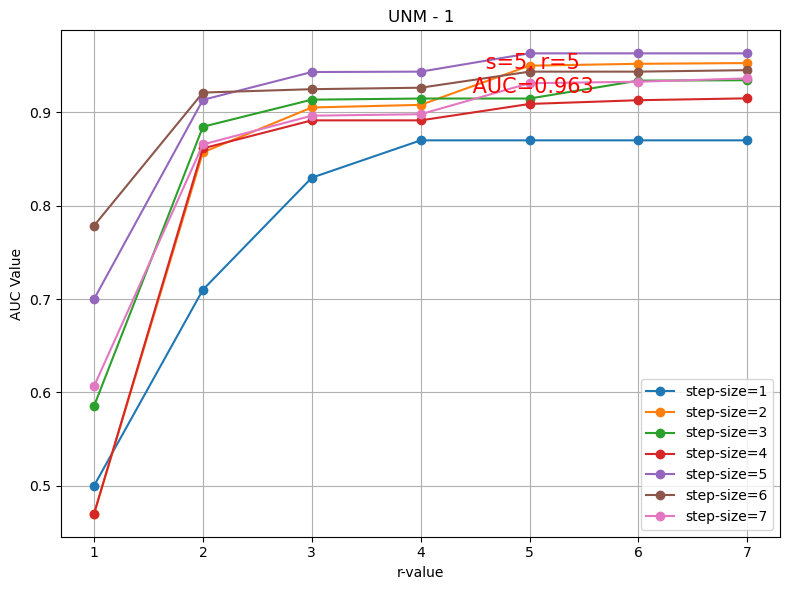

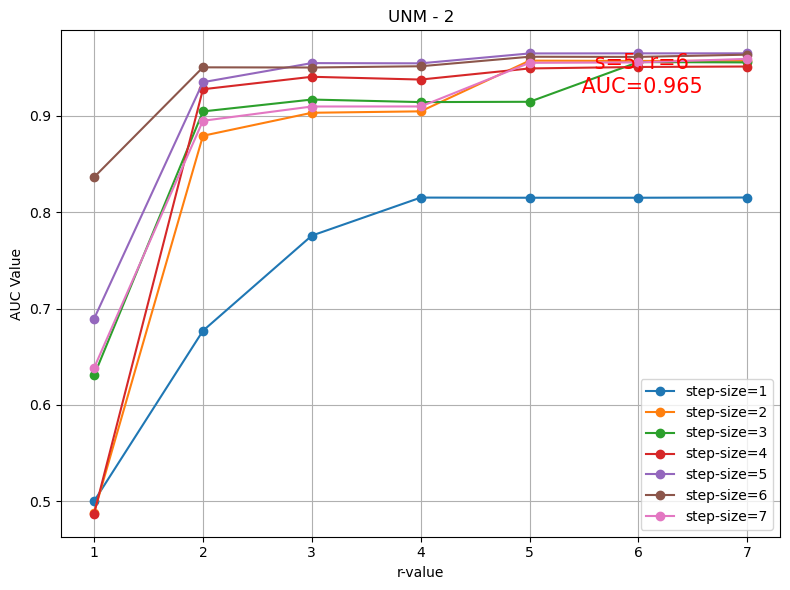

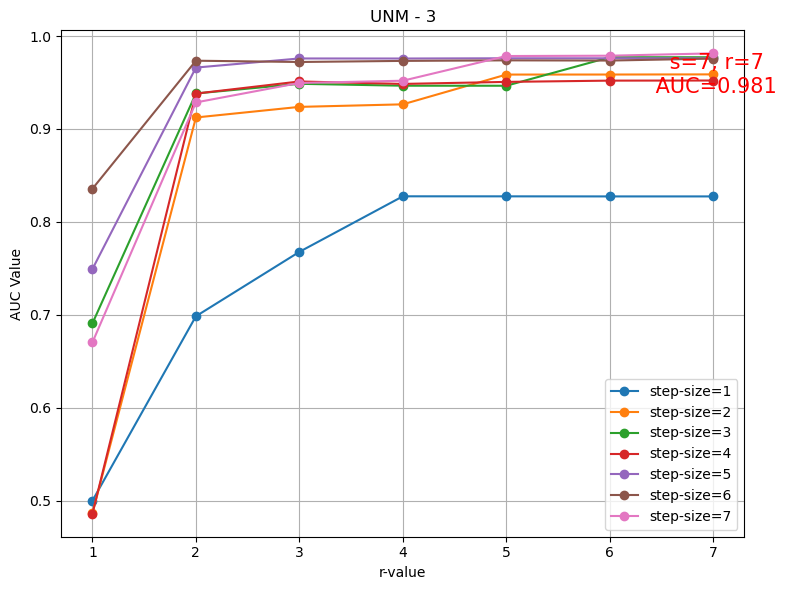

In [266]:


# Loop through each dataset and plot its steps
for i, auc_dataset in enumerate(aucs):
    # Create the plots
    fig = plt.figure( figsize=(8, 6))

    max_auc=0
    max_r=None
    max_s=None
    for s in range(7):  # For s=1 to s=7
        auc_values = auc_dataset[s]
        plt.plot(range(1, len(auc_values) + 1), auc_values, marker='o', label=f'step-size={s+1}')

        # Find the maximum AUC value for this step
        if max(auc_values) > max_auc:
            max_auc = max(auc_values)
            max_r = auc_values.index(max_auc) + 1  # index gives 0-based, we need 1-based for r
            max_s = s
    plt.text(max_r, max_auc, f' s={max_s+1}, r={max_r}\n AUC={max_auc:.3f}',fontsize=15, ha='center', va='top', color='red')

    # Customize each subplot
    plt.title(f'UNM - {i+1}')
    plt.xlabel('r-value')
    plt.ylabel('AUC Value')
    plt.grid(True)
    plt.legend()

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.savefig(f'figures/unm-{i+1}-mean')

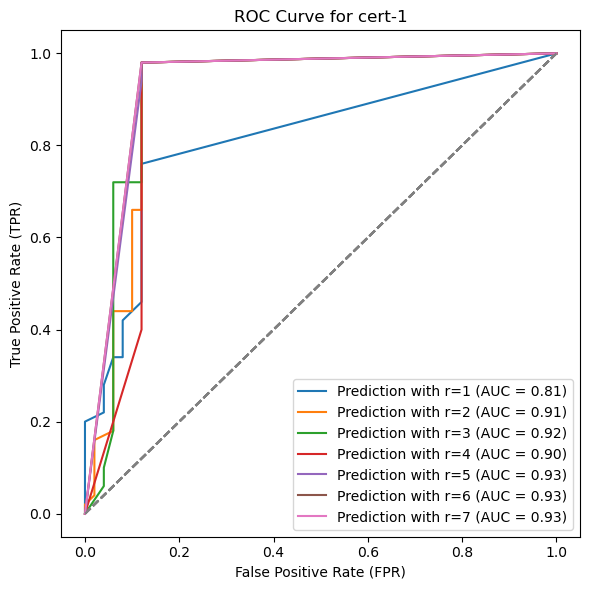

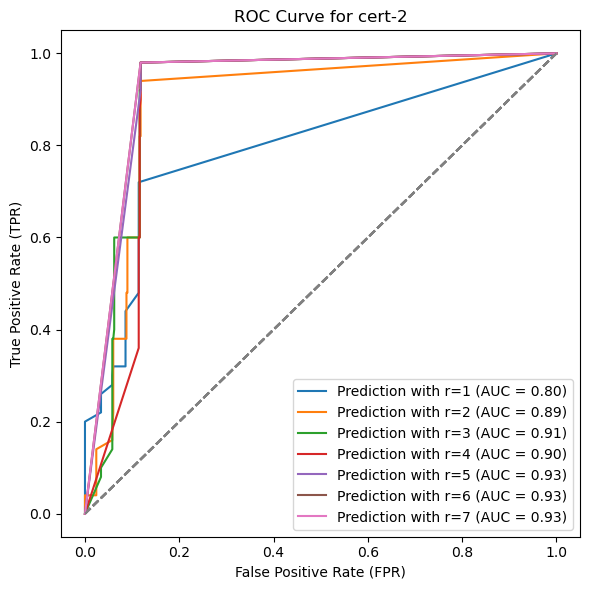

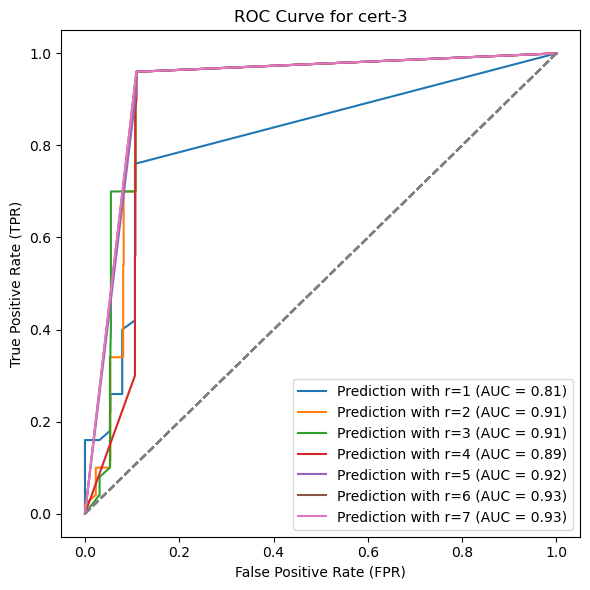

In [255]:
rocs_cert = []
for i in range(1,4):
    # Create subplots for 8 different ROC curves
    fig = plt.figure(figsize=(6, 6))  # 4 rows, 2 columns for 8 subplots
    # Loop through your files and plot ROC curves in subplots
    for n in range(1, 8):
        labels, data = read_test_file(f"syscalls/snd-cert/tests/test-syscall-snd-cert.{i}-n7-{n}.txt","cert", i, n=7) # Assuming you have a function to read the files
        rocs_cert.append (roc(labels, data, fig, f'Prediction with r={n}', axs=False))  # Plot in the appropriate subplot

    # Adjust layout for better spacing between subplots
    
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(f'ROC Curve for cert-{i}')
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.savefig(f'figures/cert-{i}')

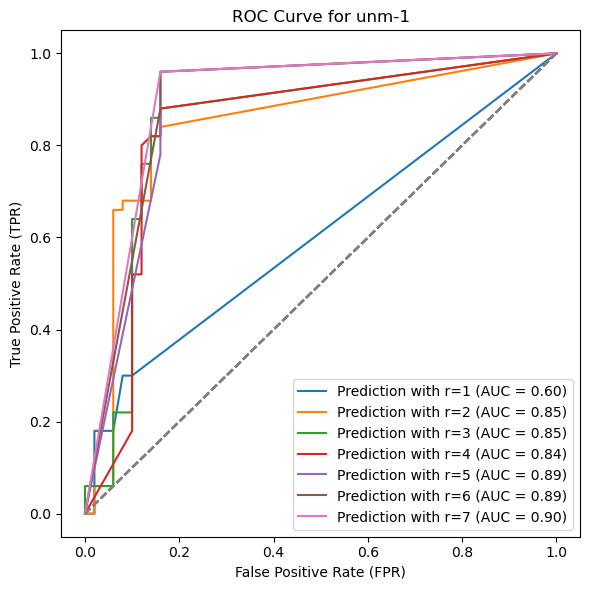

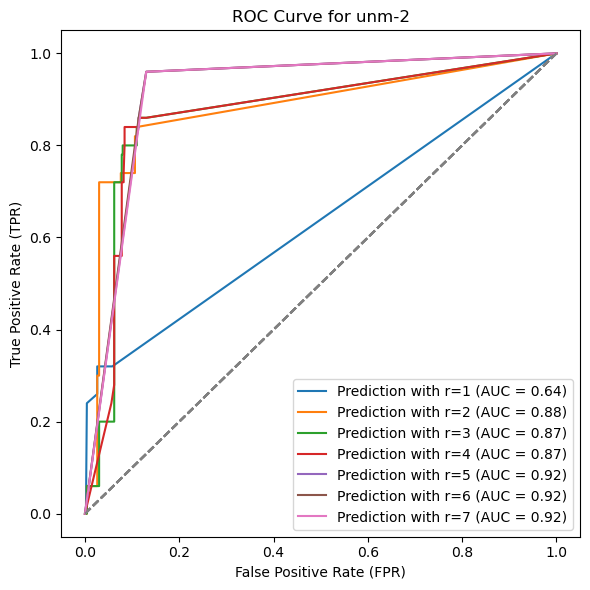

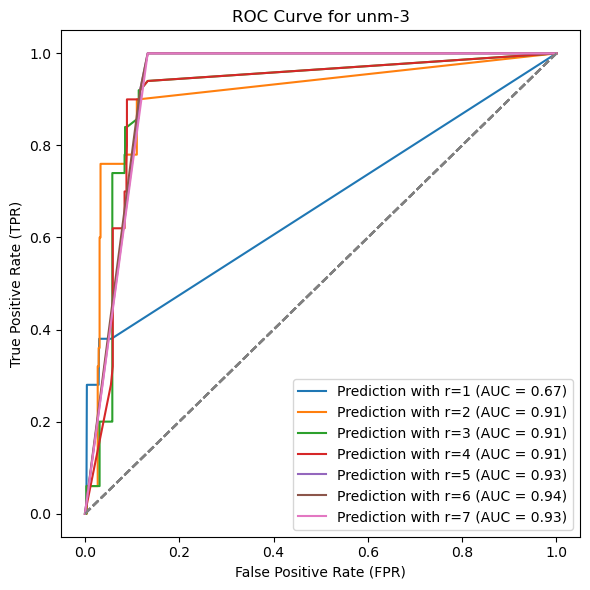

In [142]:
rocs_unm = []
for i in range(1,4):
    # Create subplots for 8 different ROC curves
    fig = plt.figure(figsize=(6, 6))  # 4 rows, 2 columns for 8 subplots
    # Loop through your files and plot ROC curves in subplots
    for n in range(1, 8):
        labels, data = read_test_file(f"syscalls/snd-unm/tests/test-syscall-snd-unm.{i}-n7-{n}.txt","unm", i, n=7) # Assuming you have a function to read the files
        rocs_unm.append(roc(labels, data, fig, f'Prediction with r={n}', axs=False))  # Plot in the appropriate subplot

    # Adjust layout for better spacing between subplots
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(f'ROC Curve for unm-{i}')
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.savefig(f'figures/unm-{i}')

In [ ]:
for x in rocs_cert[:7]:
    print(x)

0.8133999999999999
0.9094
0.9184
0.8952
0.9276
0.9299999999999999
0.9299999999999999


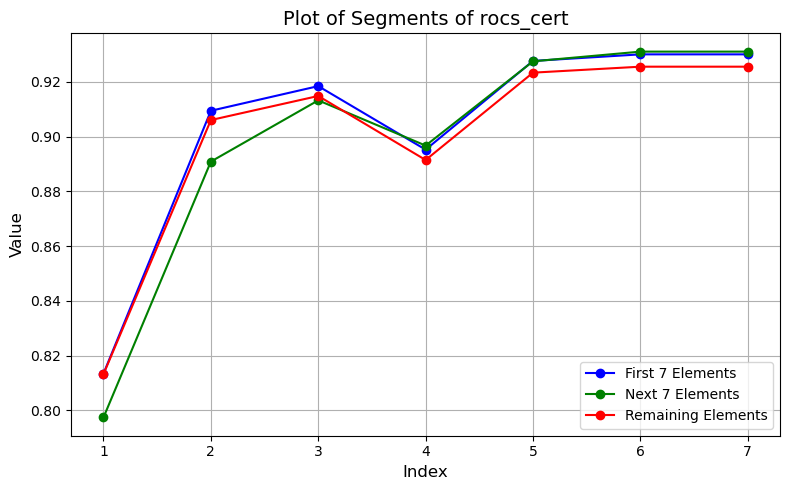

In [ ]:
import matplotlib.pyplot as plt

# Assuming rocs_cert is defined
# Example: rocs_cert = [your_data_here]  # Replace with actual data

# Extract the first 7 elements, the next 7, and the remaining elements
data_to_plot = [rocs_cert[:7], rocs_cert[7:14], rocs_cert[14:]]
# Create a new figure for plotting
plt.figure(figsize=(8, 5))

# Plot each segment as a separate line
plt.plot(range(1, 8), data_to_plot[0], marker='o', linestyle='-', color='b', label='Cert1')
plt.plot(range(1, 8), data_to_plot[1], marker='o', linestyle='-', color='g', label='Cert2')
plt.plot(range(1, 8), data_to_plot[2], marker='o', linestyle='-', color='r', label='Cert3')

# Labeling the axes
plt.xlabel('Index', fontsize=12)
plt.ylabel('Value', fontsize=12)

# Title and grid
plt.title('Plot of Segments of rocs_cert', fontsize=14)
plt.grid(True)

# Show legend
plt.legend()

# Show the plot
plt.tight_layout()
